In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Mamiraua Dataset Plot

In [3]:
lag = 512

base = pd.read_pickle('./pkl_datasets/mamiraua_dataset_ACF_' + str(lag) + '.gzip')
cotas = pd.read_csv('./boundary_files/Cotas_HxC_bins_' + str(int(lag)) + '.csv')
noise = pd.read_csv('./coloredNoises/coloredNoises_' + str(int(lag)) + '.csv')

## Information Theory Quantifier Signatures

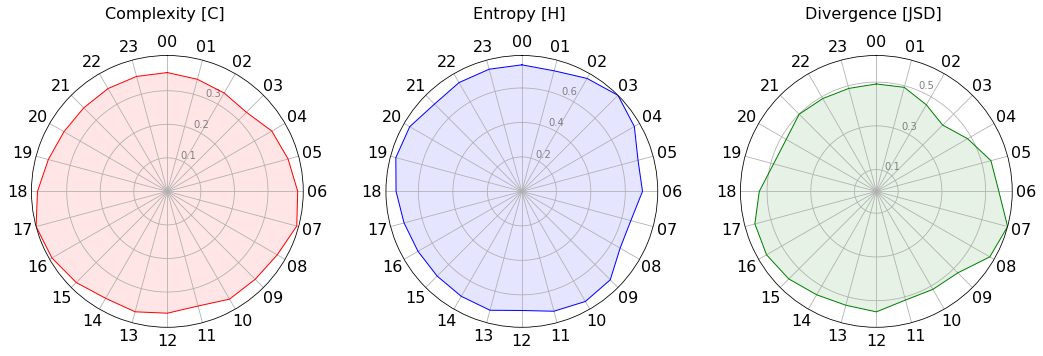

In [5]:
time = np.unique(base['time'])
H_mu = np.empty((0))
H_CI = np.empty((0))

C_mu = np.empty((0))
C_CI = np.empty((0))

JSD_mu = np.empty((0))
JSD_CI = np.empty((0))

t = np.empty(0)
for j in time:
        if j[2:3] == '0': 
            t = np.append(t,str(j[0:2]))

            H = base.loc[(base['time'] == j) | (base['time'] == str(j[0:2] + '3000'))]['H']
            H_mu = np.append(H_mu,np.mean(H))

            C = base.loc[(base['time'] == j) | (base['time'] == str(j[0:2] + '3000'))]['C']
            C_mu = np.append(C_mu,np.mean(C))

            JSD = base.loc[(base['time'] == j) | (base['time'] == str(j[0:2] + '3000'))]['JSD']
            JSD_mu = np.append(JSD_mu,np.mean(JSD))
        
N = len(t)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18,5))
plt.rc('font', size=22)
plt.rc('axes', titlesize=22)
# We are going to plot the first line of the data frame. But we need to repeat the first value to close the circular graph:
values = C_mu        
values = np.append(values, C_mu[0])
ax = plt.subplot(1,3,1, polar=True)
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], t, size=16)
plt.yticks([0.1,0.2,0.3], ["0.1","0.2","0.3"], color="grey", size=10)
plt.ylim(0,np.max(C_mu))
ax.plot(angles, values, linewidth=1, linestyle='solid', c='r')
ax.fill(angles, values, 'r', alpha=0.1)
plt.title('Complexity [C] \n', size=16)

values = H_mu        
values = np.append(values, H_mu[0])
ax = plt.subplot(1,3,2, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], t, size=16)
plt.yticks([0.2,0.4,0.6], ["0.2","0.4","0.6"], color="grey", size=10)
plt.ylim(0,np.max(H_mu))
ax.plot(angles, values, linewidth=1, linestyle='solid', c='b')
ax.fill(angles, values, 'b', alpha=0.1)
plt.title('Entropy [H] \n', size=16)

values = JSD_mu        
values = np.append(values, JSD_mu[0])
ax = plt.subplot(1,3,3, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], t, size=16)
plt.yticks([0.1,0.3,0.5], ["0.1","0.3","0.5"], color="grey", size=10)
plt.ylim(0,np.max(JSD_mu))
ax.plot(angles, values, linewidth=1, linestyle='solid', c='g')
ax.fill(angles, values, 'g', alpha=0.1)
plt.title('Divergence [JSD] \n', size=16)

plt.savefig('./figures/Fig21.eps', format="eps", bbox_inches='tight')

plt.show()